## Normalizing Continuous Features

Consider data drawn from a 2 dimensional normal distribution. 
Normalize the data by first subtracting the mean from each dimension and then dividing the result by its respective standard deviation. 

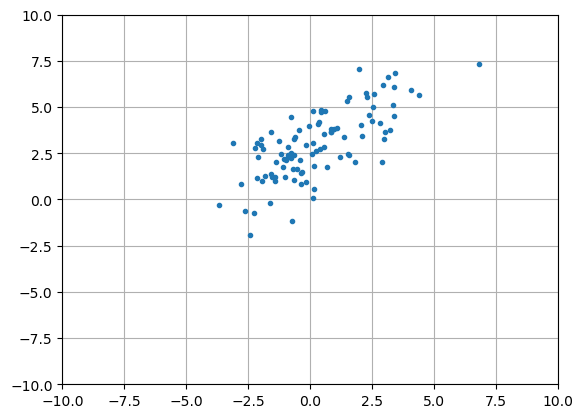

In [1]:
# You don't need to modify this cell

import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

# Generates some toy data
mu = np.array([0,3])
C = np.array([[5.,4.],[4.,5.]])
X = mvn(mu,C,100)
#print(X)
# Plot the data
plt.plot(X[:,0], X[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)
plt.show()

[0.25080773 3.25209776]
2.5854883462840745


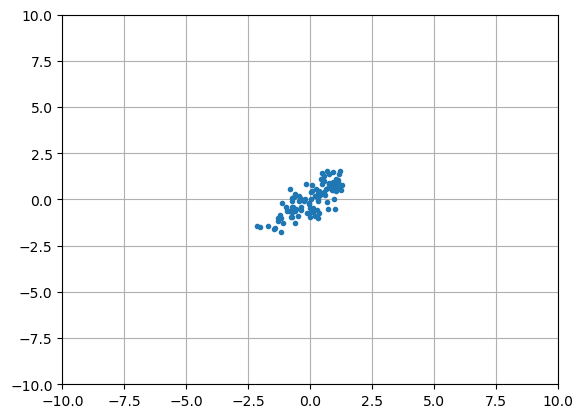

In [141]:
# Normalize data
import numpy as np
mu =  np.mean(X, axis=0) # Calculate the mean along each column (feature) of the data
print(mu)
stdev =  stdev = np.std(X) # Calculate the standard deviation of the entire data
print(stdev)
Xnormalized = (X - mu) / stdev # Normalize the data by subtracting the mean and dividing by the standard deviation

plt.plot(Xnormalized[:,0], Xnormalized[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)
plt.show()


## One-Hot Encoding

Consider the data set ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

Write a function ``one_hot_encoding`` that takes a list of strings like the above and returns an $m \times n$ numpy array, where $m$ is the number of samples and $n$ the number of unique items. Each row corresponds to the one-hot-encoded version of the respective data point in the original list. Don't forget the docstrings!

*Note*: The output of your solution should be the same as the one from ``sklearn``'s ``OneHotEncoder`` (see below).

In [142]:
# one-hot Encoding using sklearn OneHotEncoder
#data = ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']
#import numpy as np
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#two_d_array = [[item] for item in data]
#enc.fit(two_d_array)
#result = enc.transform(two_d_array).toarray()
##############################################################################

data = ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']
import numpy as np

def one_hot_encoding(string_list):
    """
        This function performs One-Hot Encoding, creating a unique list from the input sample.
        Subsequently, it generates a 2D array with dimensions equal to the number of samples and
        the length of the unique list, initializing it with zeros. 
        In a loop, for each item in the sample list, a one is written at its index in the two-dimensional array.

        Input: Sample list
        Output: One-Hot Encoding 2D array
    """    
    unique_list = np.unique(data).tolist()# delete duplicates from string list -> ['blue', 'green', 'red', 'yellow'] 
    two_d_array = np.zeros((len(data),len(unique_list))) # mXn np array with zeros
    
    for i, item in enumerate(string_list): # index and element of the list 
        two_d_array[i][unique_list.index(item)] = 1 # i = row number #  index of the item in unique_list
    
    return two_d_array

one_hot_encoded_data = one_hot_encoding(data)
one_hot_encoded_data

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [143]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(sparse_output=False).fit_transform(np.vstack(data))

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [144]:
# tests whether the first row encoding is the same as the third
assert (one_hot_encoded_data[0,:] - one_hot_encoded_data[2,:]).sum() == 0
# tests whether the second row encoding is the same as the last
assert (one_hot_encoded_data[1,:] - one_hot_encoded_data[-1,:]).sum() == 0
# tests whether each row has only one non-zero entry
assert (one_hot_encoded_data.sum(axis=1) - np.ones(one_hot_encoded_data.shape[0])).sum() == 0


## Bag-of-Words Features

Consider the small data set *corpus*.

Implement a function ``bag_of_words`` that takes a list of sentences as strings and transforms them into a (preferably sparse) numpy array of size number-of-data-points-by-number-of-words-in-the-corpus.

Compare your result with the result from [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [1]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']

In [2]:
import numpy as np
def bag_of_words(corpus):
    """
    This function creates a Bag of Words (BoW) representation for a given corpus.
    It preprocesses the input corpus by converting it to lowercase and removing specified characters.
    Then, it collects unique words and generates a 2D array with dimensions equal to the number of sentences
    and the length of the unique word list, initializing it with zeros.
    Finally, it fills in the BoW array by counting the occurrences of each word in each sentence.

    Input:
        corpus: A list of strings representing sentences.

    Output:
        bow_array: A 2D array representing the Bag of Words for the input corpus.
    """
    remove_char = str.maketrans('', '', '?.')# using maketrans for removing specific characters from corpus
    words = []
    
    # make a list of sentences and their words of corpus and remove specific character with translate method
    # convert words to lowercase and split words in every line 
    sentences = [line.lower().translate(remove_char).split() for line in corpus]
 
   
    for sentence in sentences:  # make a list of words from list of sentences 
        words.extend(sentence)
    
    
    words_unique = np.unique(words).tolist()# make a unique words list convert from np array to list because of index
    print("unique words:",words_unique)
    
    # Create bow array the count of sentences will be rows and the count of unique word will be the columns
    bow_array = np.zeros((len(sentences), len(words_unique)))
    
    for i, sentence in enumerate(sentences):# loop through the sentences 
        for word in sentence:# loop through words in every sentence
            bow_array[i, words_unique.index(word)] += 1 # add one to the cell in array 
            
    return bow_array 
bag_of_words(corpus)

unique words: ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


array([[0., 1., 1., 1., 0., 0., 1., 0., 1.],
       [0., 2., 0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 0., 0., 1., 0., 1.]])

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print("Vocabulary: {}".format(vectorizer.get_feature_names_out()))
X.toarray()


Vocabulary: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])